Netflix Movies and TV shows analysis and visualization project

This is my final notebook for this project. For this project, I chose a dataset from kaggle.com called Netflix Movies and TV Shows (link to dataset: https://www.kaggle.com/shivamb/netflix-shows/kernels), which includes movies and TV shows available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
I also used other datsets from google trends, which are the datasets of netflix trending scores of the US versus the world.

For this dataset, some of my questions are:
1. What are the countries that produce most movies and TV shows?
2. How many movies and TV shows are added into Netflix per year?
3. What is the average length of movie and tv show titles per year?
4. What is the distribution of the duration of movies and TV shows? Is there a relationship between duration and average title length?
5. What is the distribution of the age ratings for Netflix movies and TV shows?
6. What is the difference between netflix US trending scores and netflix worldwide trending scores from 2015 until present?


In [1]:
import pandas as pd
import altair as alt
import numpy as np

In [2]:
nf_show = pd.read_csv('netflix_shows.csv')

In [3]:
nf_show.shape

(6234, 12)

In [4]:
nf_show.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China   9-Sep-19          2019   
1                            United Kingdom   9-Sep-16          2016   
2                             United States   8-Sep-18          2013   
3                             United States   8-Sep-18          2016   
4                             United States   8-Sep-17          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [5]:
nf_show.columns
#The columns mean:
#'show_id': id of a movie/TV show (it can be used to trace IMDB scores, etc.,)
#'type': there are only 2 categories - movie or TV show
#'title': name of the movie/TV show
#'director' and 'cast': names of the directors and the main casts of the movies and TV shows
#'country': names of the countries that produce each of the movie/TV show
#'date_added': day, month, and year a movie/TV show is added to Netflix
#'release_year': when the movie/TV show is originally released
#'rating': age rating
#'duration': the length of a movie (minutes)/ TV show (seasons)
#'listed_in': genres of a movie/TV show
#'description': the content brief of a movie/TV show

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
nf_show = nf_show.drop(['show_id','description'],axis=1).fillna('Null')
nf_show.head()
#I dropped 2 columns called "show_id" and "description" because they aren't necessary for my analysis questions. 
#I also noticed that there were several blank cells in the dataframe. Therefore, I used the fillna method to fill in the cells. I chose to fill in with the string "Null"

type                                    title                  director  \
0    Movie  Norm of the North: King Sized Adventure  Richard Finn, Tim Maltby   
1    Movie               Jandino: Whatever it Takes                      Null   
2  TV Show                       Transformers Prime                      Null   
3  TV Show         Transformers: Robots in Disguise                      Null   
4    Movie                             #realityhigh          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China   9-Sep-19          2019   
1                            United Kingdom   9-Sep-16          2016   
2                             United States   8-Sep-18          2013   
3                             United States   8-Sep-18          2016   
4                             United States   8-Sep-17          2017   

     rating  duration                           listed_in  
0     TV-PG    90 min  Children & Family Movies, Comedies  
1     TV-MA    94 min                     Stand-Up Comedy  
2  TV-Y7-FV  1 Season                            Kids' TV  
3     TV-Y7  1 Season                            Kids' TV  
4     TV-14    99 min                            Comedies

Here is my first question: 
 - What are the countries that produce most movies and TV shows?

In [9]:
from collections import Counter
country_data = nf_show['country']
country_count = pd.Series(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')),name = 'counts'
).sort_values(ascending=False)
country_count = country_count.drop('Null')
country_count_df = country_count.to_frame().reset_index()
country_count_df.shape
#Here I created a series with the list of unique countries and the counts of their appearance in the "country" column of the dataframe. I used the Counter sub-class from the Collections module in order to count hashable objects.
#I also sorted the series so that the counts are sorted in a descending order.
#I changed the series into a dataframe for later visualization.

(111, 2)

In [10]:
top_countries_df = country_count_df[country_count_df.counts >= 50]
top_countries_df.shape
#There are a lot of countries that are involved in making movies and shows in this dataset, but I'm only interested in the countries that porduce most movies and tv shows.
#Therefore, I created a dataframe with only the countries that have the counts equal or over 50.

(22, 2)

In [11]:
#I got 22 countries that appear more than 50 times in the dataset (23 includes the title column).

In [12]:
chart_1 = alt.Chart(top_countries_df).mark_bar(
).encode(x= alt.X('index', sort = 'x'), y= 'counts',tooltip = 'counts'
).interactive()
chart_1

alt.Chart(...)

The bar chart here visualizes the dataframe of the top 22 countries above. 
According to the chart, the United States produces most movies and tv shows.
Coming in the second place is India, and the third place is the UK.

My second question is:
 - How many movies and TV shows are added into Netflix per year?

In [14]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [15]:
nf_show[['day_added','month_added','year_added']] = nf_show['date_added'].str.split("-", expand=True)
nf_show = nf_show.drop(['date_added','day_added','month_added'], axis = 1)
nf_show.head()

#For the original "date_added" column of the original dataframe, I split the date string into three parts - day, month, and year.
#I'm only interested in the year the movies and TV shows are added, therefore I dropped the original date_added column and the columns for day and month added.

type                                    title                  director  \
0    Movie  Norm of the North: King Sized Adventure  Richard Finn, Tim Maltby   
1    Movie               Jandino: Whatever it Takes                      Null   
2  TV Show                       Transformers Prime                      Null   
3  TV Show         Transformers: Robots in Disguise                      Null   
4    Movie                             #realityhigh          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country  release_year    rating  duration  \
0  United States, India, South Korea, China          2019     TV-PG    90 min   
1                            United Kingdom          2016     TV-MA    94 min   
2                             United States          2013  TV-Y7-FV  1 Season   
3                             United States          2016     TV-Y7  1 Season   
4                             United States          2017     TV-14    99 min   

                            listed_in year_added  
0  Children & Family Movies, Comedies         19  
1                     Stand-Up Comedy         16  
2                            Kids' TV         18  
3                            Kids' TV         18  
4                            Comedies         17

In [16]:
chart_2 = alt.Chart(nf_show).mark_line(
).encode(x= 'year_added:O', y='count():Q', color = 'type:N',tooltip = 'count()'
).interactive()
chart_2

alt.Chart(...)

According to the line graph, there weren't many movies and and TV shows added into Netflix before 2015.

After 2015, there was a soar in the number of movies and TV shows on Netflix.

However, the increase in movies tends to slow down gradually after mid-2016, while the increase in TV shows becomes more dramatic since 2018. It seems that Netflix is focusing more on TV shows than movies recently.

I ignored the numbers in 2020 because the year is not over, hence the results do not reflect anything.

My third question is:
 - What is the average length of movie and TV show titles per year?

In [17]:
nf_show["title_length"]= nf_show["title"].str.len() 
nf_show.head()
#I created a new column that counts the character length of each of the movie title.

type                                    title                  director  \
0    Movie  Norm of the North: King Sized Adventure  Richard Finn, Tim Maltby   
1    Movie               Jandino: Whatever it Takes                      Null   
2  TV Show                       Transformers Prime                      Null   
3  TV Show         Transformers: Robots in Disguise                      Null   
4    Movie                             #realityhigh          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country  release_year    rating  duration  \
0  United States, India, South Korea, China          2019     TV-PG    90 min   
1                            United Kingdom          2016     TV-MA    94 min   
2                             United States          2013  TV-Y7-FV  1 Season   
3                             United States          2016     TV-Y7  1 Season   
4                             United States          2017     TV-14    99 min   

                            listed_in year_added  title_length  
0  Children & Family Movies, Comedies         19            39  
1                     Stand-Up Comedy         16            26  
2                            Kids' TV         18            18  
3                            Kids' TV         18            32  
4                            Comedies         17            12

In [18]:
avg_len = nf_show.groupby('release_year')['title_length'].mean()
avg_len = avg_len.to_frame().reset_index()
avg_len.head()
#I used the split-apply-combine operation to calculate the average movie and TV show title length (in characters) by each year

release_year  title_length
0          1925     33.000000
1          1942     17.000000
2          1943     36.666667
3          1944     26.666667
4          1945     19.000000

In [19]:
chart_3 = alt.Chart(avg_len, width = 500).mark_bar(
).encode(x= 'release_year:O', y='title_length:Q', tooltip = 'title_length'
).interactive()
chart_3

alt.Chart(...)

According to the graph, most of the movies and TV shows have the title length less than 20 characters. There are some older movies and shows that have more than 30 characters in their titles.

My fourth question is: 
 - What is the distribution of the duration of movies and TV shows?

For this question, I decided to created two dataframes that include either only movies or only TV shows. 

In [21]:
movie_df = nf_show[nf_show['type'] == 'Movie']
movie_df.shape

(4265, 11)

In [23]:
movie_df[['duration(min)','Minutes']] = movie_df['duration'].str.split(" ", expand=True)
movie_df.head()
#Since I want only integers for the movie duration, I created new columns called duration(min) and minutes that contain the split strings from the original "duration" column.

type                                    title  \
0  Movie  Norm of the North: King Sized Adventure   
1  Movie               Jandino: Whatever it Takes   
4  Movie                             #realityhigh   
6  Movie                                 Automata   
7  Movie       Fabrizio Copano: Solo pienso en mi   

                          director  \
0         Richard Finn, Tim Maltby   
1                             Null   
4                 Fernando Lebrija   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   

                                    country  release_year rating duration  \
0  United States, India, South Korea, China          2019  TV-PG   90 min   
1                            United Kingdom          2016  TV-MA   94 min   
4                             United States          2017  TV-14   99 min   
6    Bulgaria, United States, Spain, Canada          2014      R  110 min   
7                                     Chile          2017  TV-MA   60 min   

                                           listed_in year_added  title_length  \
0                 Children & Family Movies, Comedies         19            39   
1                                    Stand-Up Comedy         16            26   
4                                           Comedies         17            12   
6  International Movies, Sci-Fi & Fantasy, Thrillers         17             8   
7                                    Stand-Up Comedy         17            34   

  duration(min) Minutes  
0            90     min  
1            94     min  
4            99     min  
6           110     min  
7            60     min

In [24]:
movie_df = movie_df.drop(['duration','Minutes'], axis = 1)
movie_df.head()
convert_dict = {'duration(min)': int}
movie_df = movie_df.astype(convert_dict)
movie_df.head()
#I dropped the two unecessary columns which are the original "duration" column and the "Minutes" column.
#The numbers in the duration(min) column still have the string format, therefore I converted the strings to the int type. 

type                                    title  \
0  Movie  Norm of the North: King Sized Adventure   
1  Movie               Jandino: Whatever it Takes   
4  Movie                             #realityhigh   
6  Movie                                 Automata   
7  Movie       Fabrizio Copano: Solo pienso en mi   

                          director  \
0         Richard Finn, Tim Maltby   
1                             Null   
4                 Fernando Lebrija   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   

                                    country  release_year rating  \
0  United States, India, South Korea, China          2019  TV-PG   
1                            United Kingdom          2016  TV-MA   
4                             United States          2017  TV-14   
6    Bulgaria, United States, Spain, Canada          2014      R   
7                                     Chile          2017  TV-MA   

                                           listed_in year_added  title_length  \
0                 Children & Family Movies, Comedies         19            39   
1                                    Stand-Up Comedy         16            26   
4                                           Comedies         17            12   
6  International Movies, Sci-Fi & Fantasy, Thrillers         17             8   
7                                    Stand-Up Comedy         17            34   

   duration(min)  
0             90  
1             94  
4             99  
6            110  
7             60

In [25]:
chart_4 = alt.Chart(movie_df,width = 700).mark_bar(
).encode(x= 'duration(min)', y= 'count()', tooltip = 'count()'
).interactive()
chart_4

alt.Chart(...)

According to the histogram, the duration of movies throughout the years have a normal distribution that centers at around 90 minutes.

In [26]:
tv_show_df = nf_show[nf_show['type'] == 'TV Show']
tv_show_df[['duration(season)','season']] = tv_show_df['duration'].str.split(" ", expand=True)
tv_show_df = tv_show_df.drop(['duration','season'], axis=1)
convert_dict1 = {'duration(season)':int}
tv_show_df = tv_show_df.astype(convert_dict1)
tv_show_df.head()

#I also did the same for the TV show dataframe. I only kept the numbers in a column called "duration(season)", and converted the strings to integers.

type                             title director  \
2   TV Show                Transformers Prime     Null   
3   TV Show  Transformers: Robots in Disguise     Null   
5   TV Show                           Apaches     Null   
8   TV Show                      Fire Chasers     Null   
26  TV Show                   Castle of Stars     Null   

                                                 cast        country  \
2   Peter Cullen, Sumalee Montano, Frank Welker, J...  United States   
3   Will Friedle, Darren Criss, Constance Zimmer, ...  United States   
5   Alberto Ammann, Eloy Azorín, Verónica Echegui,...          Spain   
8                                                Null  United States   
26  Chaiyapol Pupart, Jintanutda Lummakanon, Worra...           Null   

    release_year    rating                                          listed_in  \
2           2013  TV-Y7-FV                                           Kids' TV   
3           2016     TV-Y7                                           Kids' TV   
5           2016     TV-MA  Crime TV Shows, International TV Shows, Spanis...   
8           2017     TV-MA                    Docuseries, Science & Nature TV   
26          2015     TV-14  International TV Shows, Romantic TV Shows, TV ...   

   year_added  title_length  duration(season)  
2          18            18                 1  
3          18            32                 1  
5          17             7                 1  
8          17            12                 1  
26         18            15                 1

In [27]:
chart_5 = alt.Chart(tv_show_df).mark_bar(
).encode(x= 'duration(season)', y= 'count()', tooltip = 'count()'
).interactive()
chart_5

alt.Chart(...)

According to the histogram, the distribution of the TV shows throughout the years is skewed to the right. Most of the shows only have 1 season.

Follow up question: Is there a relationship between average duration per year and average title length per year?

In [28]:
avg_movie_duration = movie_df.groupby('release_year').mean()
avg_movie_duration = avg_movie_duration.reset_index()
avg_movie_duration.head()

release_year  title_length  duration(min)
0          1942     17.000000      35.000000
1          1943     36.666667      62.666667
2          1944     26.666667      52.000000
3          1945     19.000000      51.333333
4          1946     15.000000      76.000000

In [29]:
chart_9  =alt.Chart(avg_movie_duration, width  = 700).mark_bar(
).encode(x= 'release_year', y= 'duration(min)', tooltip = 'duration(min)'
).interactive()
chart_9 

alt.Chart(...)

In [30]:
chart_6 = alt.Chart(avg_movie_duration).mark_point(
).encode(x= 'duration(min)', y= 'title_length')
chart_6 + chart_6.transform_regression('duration(min)', 'title_length').mark_line()

alt.LayerChart(...)

According to the graph, there seems to be a weak negative relationship between average movie duration and average movie title length.

In [32]:
avg_tvshow_duration = tv_show_df.groupby('release_year').mean()
avg_tvshow_duration = avg_tvshow_duration.reset_index()
avg_tvshow_duration.head()

release_year  title_length  duration(season)
0          1925          33.0               1.0
1          1946          35.0               1.0
2          1963          35.0               4.0
3          1967          22.0               8.0
4          1968           9.0               3.0

In [33]:
chart_10 = alt.Chart(avg_tvshow_duration).mark_bar(
).encode(x= 'release_year' , y= 'duration(season)',tooltip = 'duration(season)').interactive()
chart_10

alt.Chart(...)

In [34]:
chart_7 = alt.Chart(avg_tvshow_duration).mark_point(
).encode(x= 'duration(season)', y= 'title_length')
chart_7 + chart_7.transform_regression('duration(season)','title_length').mark_line()

alt.LayerChart(...)

There seems to be no relationship between average TV show duration and average TV show title length.

My fifth question is:
 - What is the distribution of the age ratings for Netflix movies and TV shows?

In [36]:
rating_data_1 = movie_df['rating']
rating_count = pd.Series(Counter(','.join(rating_data_1).replace(' ,',',').replace(', ',',').split(','))
,name = 'movie_count').sort_values(ascending=False)
rating_count.drop(['Null'], axis=0, inplace=True)
rating_count1_df = rating_count.to_frame().reset_index()
rating_count1_df.head()

#Since I want to know how many times each of the ratings appear in the movie-only dataframe, I used the counter sub-class to count for the occurrence of uniques age ratings.

index  movie_count
0  TV-MA         1348
1  TV-14         1038
2      R          506
3  TV-PG          432
4  PG-13          286

In [37]:
rating_data_2 = tv_show_df['rating']
rating_count = pd.Series(Counter(','.join(rating_data_2).replace(' ,',',').replace(', ',',').split(','))
,name = 'tv_count').sort_values(ascending=False)
rating_count.drop(['Null'], axis=0, inplace=True)
rating_count2_df = rating_count.to_frame().reset_index()
rating_count2_df.head()
#I did the same thing to calculate the occurrence of unique age ratings in the TV show-only dataframe.

index  tv_count
0  TV-MA       679
1  TV-14       660
2  TV-PG       269
3   TV-Y       102
4  TV-Y7       100

In [38]:
rating_df = pd.merge(rating_count1_df, rating_count2_df,how='left')
rating_df= rating_df.fillna(0)
rating_df = rating_df.set_index('index')
rating_df.head()

#Since I want to compare the distribution of the age ratings for movies and TV shows side-by-side, I merged two dataframes with the index as the age ratings.

movie_count  tv_count
index                       
TV-MA         1348     679.0
TV-14         1038     660.0
R              506       2.0
TV-PG          432     269.0
PG-13          286       0.0

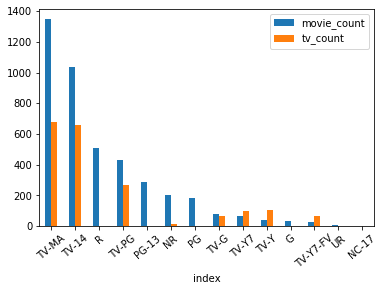

In [40]:
chart_8 = rating_df.plot.bar(rot=40)
chart_8

Both the movies and TV shows are more likely to be rated TV-MA and TV-14, which are for mature audiences and teenagers being at least 14 years old. We can see that Netflix seems to be a streaming app that are more dedicated to teenagers and adults rather than children.

My sixth question is:
- What is the difference between netflix US trending scores and netflix worldwide trending scores from 2015 until present?

In [41]:
worldwide_trend = pd.read_csv('worldwide trend.csv')
worldwide_trend.head()
#I imported another csv file called "worldwide trend", which shows the popularity scores of Netflix worldwide from 2015 to present.

Category: All categories            Unnamed: 1
0                      NaN                   NaN
1                     Week  netflix: (Worldwide)
2                 3/5/2015                    27
3                10/5/2015                    28
4                17/5/2015                    27

In [42]:
worldwide_trend = worldwide_trend.dropna(how = 'any')
worldwide_trend = worldwide_trend.drop(worldwide_trend.index[0]
).rename(columns = {"Category: All categories":"Week","Unnamed: 1": "World Score"})
worldwide_trend.head()

#I dropped the rows with NaN values by the dropna function and how='any' means that the fuction would drop any rows that contain NaN values.
#I reset the column indexes to "Week" and "World Score"
#The weeks are from May 2015 to the present, and the scores range from 0 to 100, with 100 indicating the highest popularity scores Netflix can achieve, and 0 means none. 

Week World Score
2   3/5/2015          27
3  10/5/2015          28
4  17/5/2015          27
5  24/5/2015          30
6  31/5/2015          31

In [43]:
worldwide_trend['Week'] = pd.to_datetime(worldwide_trend.Week,errors = 'coerce')
convert_dict3 = {'World Score':int}
worldwide_trend = worldwide_trend.astype(convert_dict3)
worldwide_trend.head()

#The format of the "Week" column is string. I converted strings to datetime type because I realized that altair would not graph the date-time entries chronologically if I don't change them into datetime type.
#The format of the "World Score" column is also string, therefore I had to convert the strings into integers for later visualization.

Week  World Score
2 2015-03-05           27
3 2015-10-05           28
4 2015-05-17           27
5 2015-05-24           30
6 2015-05-31           31

In [44]:
us_trend = pd.read_csv('US trend.csv')
us_trend.head()
#To compare to the worldwide Netflix trending score, I imported another csv file called "US trend", which shows the popularity of Netflix in the US from May 2015 to the present.

Category: All categories                Unnamed: 1
0                      NaN                       NaN
1                     Week  netflix: (United States)
2                 3/5/2015                        50
3                10/5/2015                        54
4                17/5/2015                        55

In [45]:
us_trend = us_trend.dropna(how='any')
us_trend = us_trend.drop(us_trend.index[0]
).rename(columns={'Category: All categories': 'Week',"Unnamed: 1":'US Score'})
us_trend['Week'] = pd.to_datetime(us_trend['Week'],errors = 'coerce')
convert_dict4 = {'US Score':int}
us_trend = us_trend.astype(convert_dict4)
us_trend.head()

#I did the same thing to this dataframe as I did to the worldwide trend dataframe, which are dropping NaN values, changing the column indexes to "Week" and "US Score", and converting the strings to datetime and integer formats

Week  US Score
2 2015-03-05        50
3 2015-10-05        54
4 2015-05-17        55
5 2015-05-24        60
6 2015-05-31        60

In [46]:
compare_score= pd.merge(worldwide_trend,us_trend)
compare_score.head()

#To make a graph that can compare the trending scores of the world and the US, I merged the two dataframes and called the new one "compare_score".

Week  World Score  US Score
0 2015-03-05           27        50
1 2015-10-05           28        54
2 2015-05-17           27        55
3 2015-05-24           30        60
4 2015-05-31           31        60

In [47]:
base = alt.Chart(compare_score.reset_index(),width=500).mark_line().encode(x='Week')
alt.layer(
    base.mark_line(color='purple').encode(y='US Score'),
    base.mark_line(color='orange').encode(y='World Score')
).interactive()

alt.LayerChart(...)

The purple line represents US trending score while the orange line represents the world score.
Both of the scores have an increasing trend, which indicates that Netflix is getting more popular over time. 
The worldwide scores were lower than the US scores until recently when the worldwide scores could be as high as the US scores. This means that a lot more users from other countries are using Netflix and Netflix is becoming more popular as a movie streaming service. 

In [48]:
director_data = movie_df['director']
director_count = pd.Series(Counter(','.join(director_data).replace(' ,',',').replace(', ',',').split(',')),name = 'counts'
).sort_values(ascending=False)
director_count = director_count.drop('Null')
director_count_df = director_count.to_frame().reset_index()
director_count_df.shape

(3535, 2)

In [49]:
top_director = director_count_df[director_count_df['counts'] >= 7]
top_director = top_director.rename(columns = {'index':'director'})
top_director.head()

director  counts
0     Jan Suter      21
1   Raúl Campos      19
2  Marcus Raboy      14
3     Jay Karas      14
4   Jay Chapman      12

In [50]:
directors_df = pd.merge(movie_df,top_director)
directors_df.head()

type         title     director  \
0  Movie        Mujrim  Umesh Mehra   
1  Movie  Aashik Awara  Umesh Mehra   
2  Movie          Qila  Umesh Mehra   
3  Movie   Yaar Gaddar  Umesh Mehra   
4  Movie          Jaal  Umesh Mehra   

                                                cast country  release_year  \
0  Mithun Chakraborty, Madhuri Dixit, Suresh Ober...   India          1989   
1  Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...   India          1993   
2  Dilip Kumar, Mukul Dev, Rekha, Mamta Kulkarni,...   India          1998   
3  Mithun Chakraborty, Saif Ali Khan, Somy Ali, P...   India          1994   
4  Jeetendra, Mithun Chakraborty, Rekha, Mandakin...   India          1986   

  rating                                         listed_in year_added  \
0  TV-14  Action & Adventure, Dramas, International Movies         17   
1  TV-14    Dramas, International Movies, Music & Musicals         17   
2  TV-14                      Dramas, International Movies         17   
3  TV-14                      Dramas, International Movies         17   
4  TV-MA          Action & Adventure, International Movies         17   

   title_length  duration(min)  counts  
0             6            163       8  
1            12            154       8  
2             4            161       8  
3            11            148       8  
4             4            162       8

In [51]:
directors  = directors_df.groupby('director').mean().reset_index()
directors.head()

director  release_year  title_length  duration(min)  counts
0  Cathy Garcia-Molina   2014.000000     19.428571     122.857143     7.0
1         David Dhawan   2004.500000     17.125000     140.875000     8.0
2     Dibakar Banerjee   2009.000000     17.500000     115.750000     7.0
3          Hakan Algül   2013.285714     14.285714     102.142857     7.0
4            Jan Suter   2017.000000     42.000000      52.000000    21.0

In [52]:
chart_11 = alt.Chart(directors,width = 500).mark_bar().encode(x='director',y='duration(min)',tooltip='duration(min)').interactive()
chart_11

alt.Chart(...)